# 第4章 PandasとMatplotlibを使ってみよう
## 4.1 データのダウンロード

In [1]:
import pandas_datareader.data as web
start="1949/5/16"
end="2016/9/30"#適当に入れ替えてください。
N225 = web.DataReader("NIKKEI225", 'fred',start,end)
N225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [2]:
N225.tail(1)

,NIKKEI225
DATE,
2016-09-30,16449.84


Text(0,0.5,'N225 index')

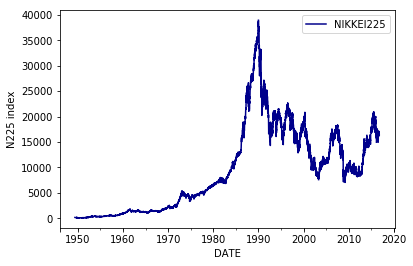

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

Text(0,0.5,'N225 index')

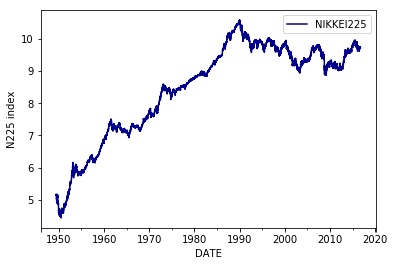

In [4]:
%matplotlib inline
import numpy as np
np.log(N225).plot(color='darkblue')
plt.ylabel('N225 index')

plt.show()を追加することにより出力の仕方が変わりました。

In [113]:
import datetime
end=datetime.datetime.now()
start=end-datetime.timedelta(days=365*5)
price = web.DataReader("AAPL", 'iex',start,end)#yahooのサービスの停止により変更 iexでは５年分のデータが取得可能
price=price.reset_index()
price.columns=['Date','Open','High','Low','Close','Volume']
price.Date=pd.to_datetime(price.Date)
price=price.set_index('Date')

## 4.2 データベースの加工

In [114]:
import pandas as pd
fx = web.DataReader('DEXJPUS',"fred",start,end)
port=pd.concat([price.Close,fx],axis=1).dropna()

Text(0,0.5,'correlation')

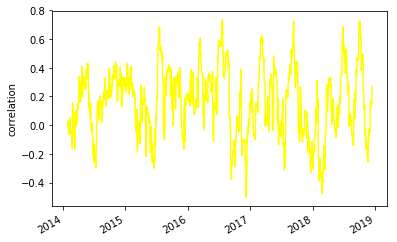

In [115]:
n=port.Close.pct_change().dropna()
f=port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')

                Open      High       Low     Close    Volume
Date                                                        
2015-01-02  103.8847  103.9313  100.1169  101.9635  53204626
2015-01-05  100.9936  101.3293   98.3076   99.0910  64285491


Text(0,0.5,'apple')

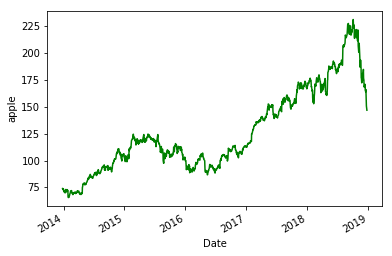

In [116]:
#price = web.DataReader("aapl", 'yahoo','1990/1/1',end)#yahooのサービスの停止により変更
price1=price.loc["1990/1/1":]#ixの停止によりlocに変更
price1.Close.plot(color='green')
price2=price["2015"].iloc[0:2]#ixの停止によりilocに変更
print(price2)
plt.ylabel('apple')

In [117]:
print(price.resample('M').first().tail())

                Open      High       Low     Close    Volume
Date                                                        
2018-08-31  197.7441  200.3558  195.9368  200.0976  67935716
2018-09-30  227.6158  228.3831  225.8420  227.5660  27390132
2018-10-31  227.1574  228.6223  225.5630  226.4698  23600802
2018-11-30  218.2884  221.5869  216.0562  221.4473  58323180
2018-12-31  184.4600  184.9400  181.2100  184.8200  40798002


In [118]:
print(price.resample('M').last().tail())

                Open      High       Low     Close    Volume
Date                                                        
2018-08-31  225.7224  228.0742  225.2142  226.8385  43340134
2018-09-30  224.0084  225.0548  223.2411  224.9551  22929364
2018-10-31  216.1259  219.6835  215.8668  218.0990  38358933
2018-11-30  180.2900  180.3300  177.0300  178.5800  39531549
2018-12-31  148.1500  151.5500  146.5900  146.8300  37169232


In [119]:
print(price.resample('M',loffset='1d').last().tail())

                Open      High       Low     Close    Volume
Date                                                        
2018-09-01  225.7224  228.0742  225.2142  226.8385  43340134
2018-10-01  224.0084  225.0548  223.2411  224.9551  22929364
2018-11-01  216.1259  219.6835  215.8668  218.0990  38358933
2018-12-01  180.2900  180.3300  177.0300  178.5800  39531549
2019-01-01  148.1500  151.5500  146.5900  146.8300  37169232


Text(0,0.5,'apple')

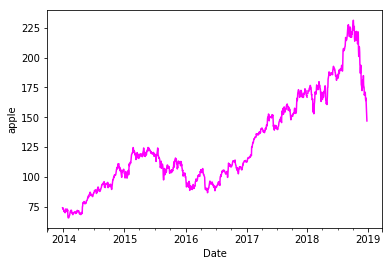

In [120]:
price.resample('A').Close.plot(color='magenta')
plt.ylabel('apple')

## 4.3 データの加工、分析


In [121]:
import numpy as np
dp=np.log(price.Close).diff()
vol=dp.std()*np.sqrt(250)
print(vol,len(price))

0.23750315869014785 1258


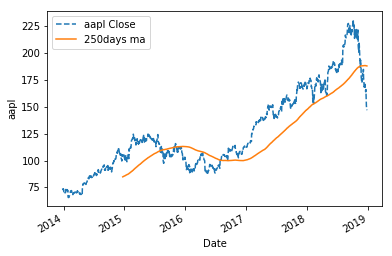

In [122]:
import pandas as pd
ma=pd.Series.rolling(price.Close,window=250).mean()
price.Close.plot(label='aapl Close',style='--')
ma.plot(label='250days ma')
plt.ylabel('aapl')
plt.legend()

Text(0,0.5,'standrd deviation 250 days aapl')

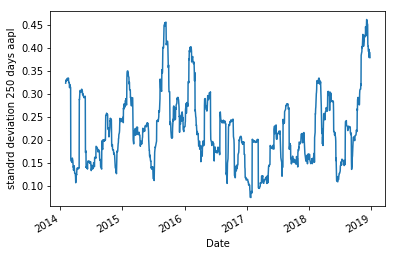

In [123]:
(pd.Series.rolling(np.log(price.Close).diff().dropna(),window=25).std()*np.sqrt(250)).plot()
plt.ylabel('standrd deviation 250 days aapl')